In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,[2,3]]
Y = data.iloc[:,4]

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [3]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [4]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,Y_train)

pred_y = classifier.predict(X_test)

accuracy = classifier.score(X_test,Y_test)
print(accuracy)

0.9083333333333333


In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)

print(cm)

[[72  7]
 [ 4 37]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


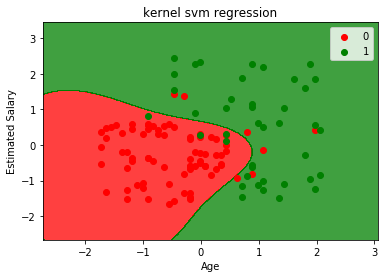

In [6]:
from matplotlib.colors import ListedColormap
x_set,y_set = X_test, Y_test
X1,X2 = np.meshgrid(np.arange(x_set[:,0].min()-1,x_set[:,0].max()+1,step=0.01),
                    np.arange(x_set[:,1].min()-1,x_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha= 0.75,
             cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1], c= ListedColormap(('red','green'))(i),label=j)

plt.title('kernel svm regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()